In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

In [2]:
x = np.linspace(-1, 8, 100)
y = 49/83 * x + 22/83

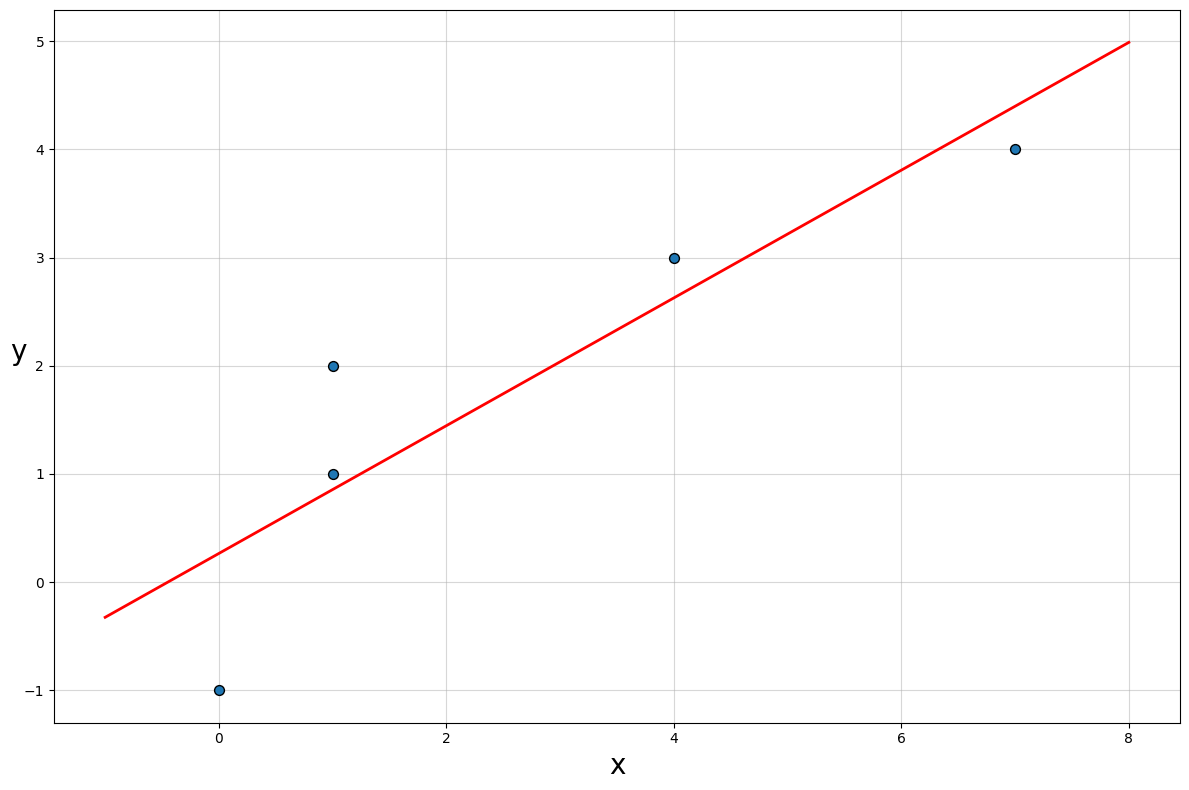

In [3]:
plt.figure(figsize=(12, 8))

plt.scatter([0, 1, 1, 4, 7], [-1, 1, 2, 3, 4], s=50, ec="k", zorder=3)
plt.plot(x, y, c="r", lw="2")

plt.xlabel("x", fontsize=20)
plt.ylabel("y", rotation=0, fontsize=20)


plt.grid(alpha=.5)

plt.tight_layout()
plt.show()

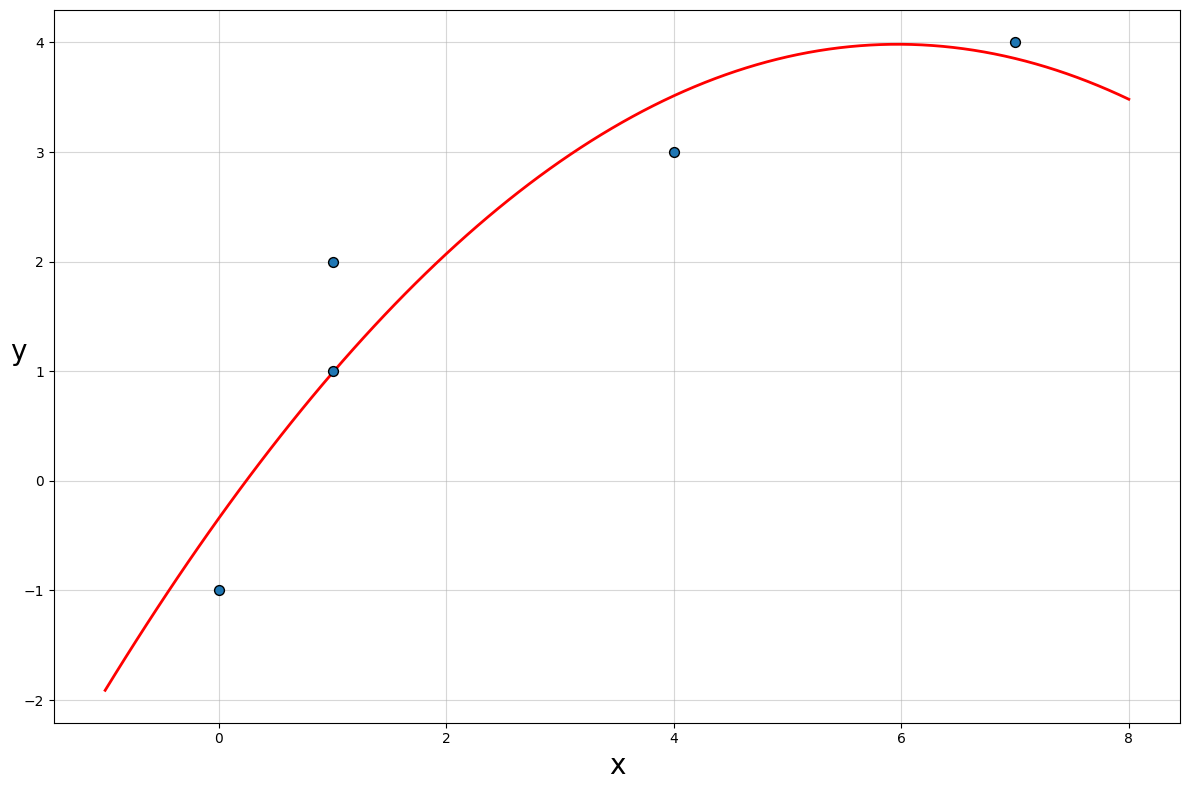

In [4]:
def phi(func, x_, y):
	return (y - (func.subs(x, x_))) ** 2


def f_diff(func, p):
	return func.diff(p)


def get_funcs(func, x_data, y_data, coef):
	funcs = []
	for p in coef:

		res = 0
		for x_coord, y_coord in zip(x_data, y_data):
			phi_ = phi(func, x_coord, y_coord)
			phi_diff = f_diff(phi_, p)
			res += phi_diff

		funcs += [res]

	return funcs


def f(func, x_data, coef):
	func = func.subs(coef)
	return [func.subs(x, x_) for x_ in x_data]


a, b, c, x = sp.symbols("a b c x")

f_sqr = a * x ** 2 + x * b + c


funcs_sqr = get_funcs(f_sqr, [0, 1, 1, 4, 7], [-1, 1, 2, 3, 4], [a, b, c])
# funcs_sqr = get_funcs(f_sqr, [-1, -1, 0, 1, 2], [3, 4, 4, 1, -2], [a, b, c])
# print(funcs_sqr)

coef = sp.solve(funcs_sqr)
# print(coef)


x = np.linspace(-1, 8, 100)
y = coef[a] * x ** 2 + coef[b] * x + coef[c]


plt.figure(figsize=(12, 8))

plt.scatter([0, 1, 1, 4, 7], [-1, 1, 2, 3, 4], s=50, ec="k", zorder=3)
plt.plot(x, y, c="r", lw="2")

plt.xlabel("x", fontsize=20)
plt.ylabel("y", rotation=0, fontsize=20)


plt.grid(alpha=.5)

plt.tight_layout()
plt.show()

k0 + k1*x1 + k2*x2
[14*k0 + 70*k1 + 56*k2 - 164, 70*k0 + 406*k1 + 270*k2 - 938, 56*k0 + 270*k1 + 280*k2 - 594]
{k0: 8629/1771, k1: 499/253, k2: -191/253}


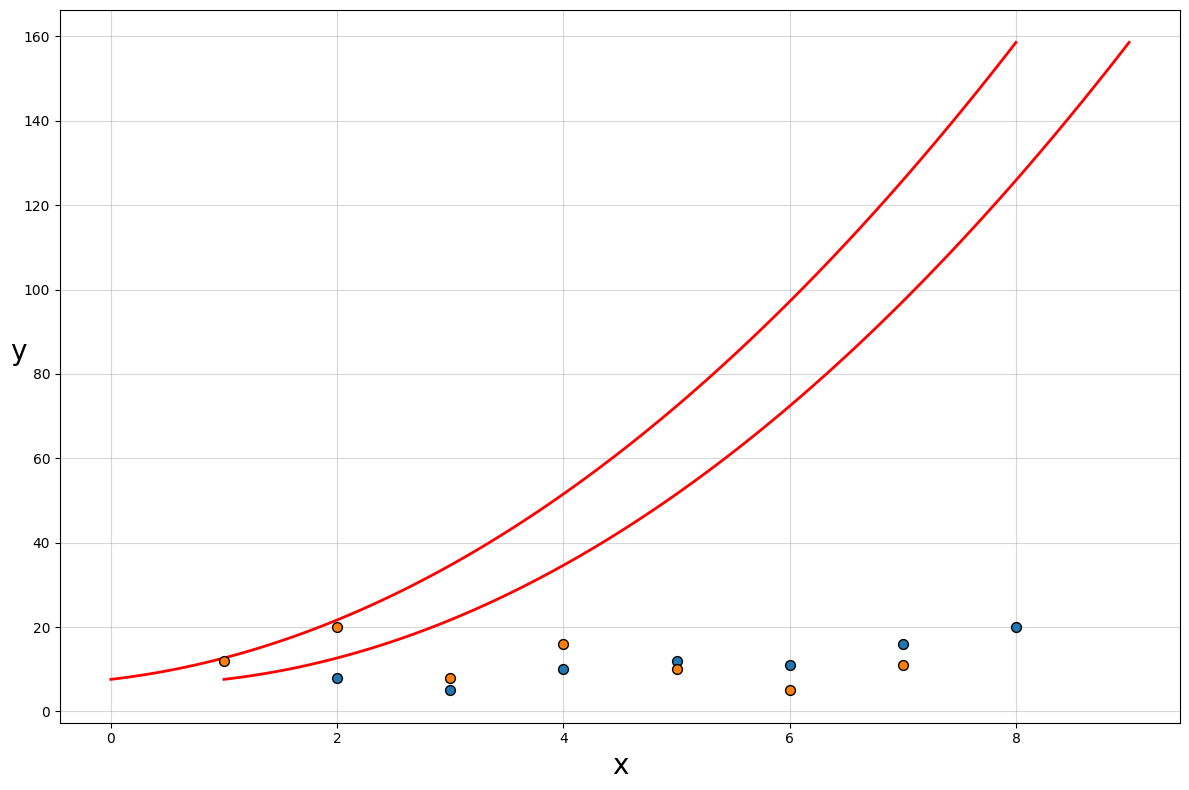

In [5]:
def phi(func, x1_, x2_, y):
	return (y - (func.subs({x1: x1_, x2: x2_}))) ** 2


def get_funcs(func, x1_data, x2_data, y_data, coef):
	funcs = []
	for p in coef:

		res = 0
		for x1_coord, x2_coord, y_coord in zip(x1_data, x2_data, y_data):
			phi_ = phi(func, x1_coord, x2_coord, y_coord)
			phi_diff = f_diff(phi_, p)
			res += phi_diff

		funcs += [res]

	return funcs


k1, k2, k0, x1, x2 = sp.symbols("k1 k2 k0 x1 x2")

f_k1x1_k2x2_k0 = k1 * x1 + k2 * x2 + k0
print(f_k1x1_k2x2_k0)


x1_data = [2, 5, 7, 3, 8, 4, 6]
x2_data = [3, 1, 4, 6, 2, 5, 7]
y_data = [8, 12, 16, 5, 20, 10, 11]

func_k1x1_k2x2_k0 = get_funcs(f_k1x1_k2x2_k0, x1_data, x2_data, y_data, [k0, k1, k2])
print(func_k1x1_k2x2_k0)

coef = sp.solve(func_k1x1_k2x2_k0)
print(coef)

x1 = np.linspace(1, 9, 100)
x2 = np.linspace(0, 8, 100)
y = coef[k1] * x1 ** 2 + coef[k2] * x + coef[k0]


plt.figure(figsize=(12, 8))

plt.scatter(x1_data, y_data, s=50, ec="k", zorder=3)
plt.scatter(x2_data, y_data, s=50, ec="k", zorder=3)
plt.plot(x1, y, c="r", lw="2")
plt.plot(x2, y, c="r", lw="2")

plt.xlabel("x", fontsize=20)
plt.ylabel("y", rotation=0, fontsize=20)


plt.grid(alpha=.5)

plt.tight_layout()
plt.show()

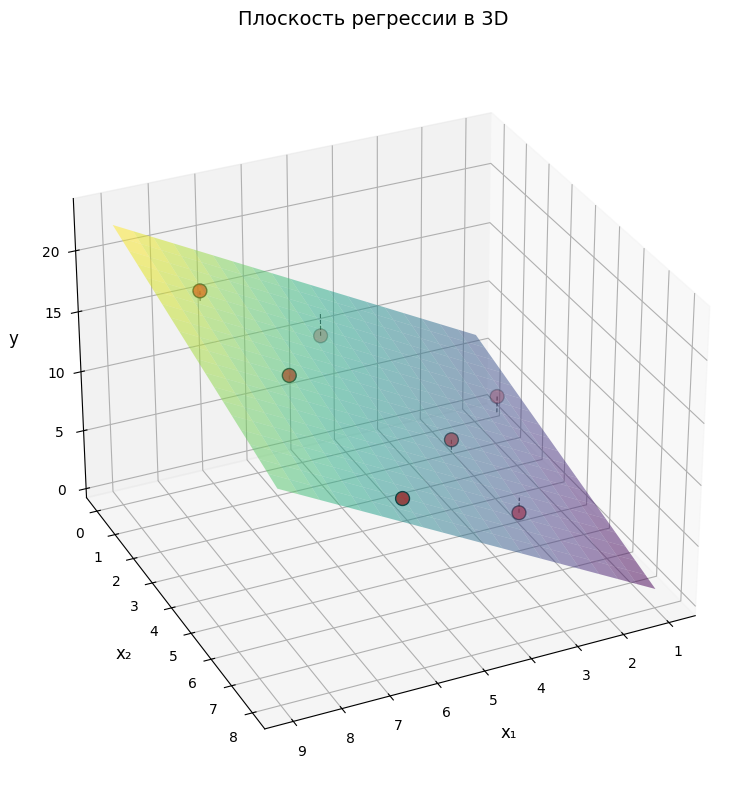

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 1. Исходные данные
x1_data = np.array([2, 5, 7, 3, 8, 4, 6])
x2_data = np.array([3, 1, 4, 6, 2, 5, 7])
y_data = np.array([8, 12, 16, 5, 20, 10, 11])

# 2. Найденные коэффициенты МНК
k0 = 4.872
k1 = 1.972
k2 = -0.755

# 3. Функция плоскости
def plane(x1, x2):
    return k1*x1 + k2*x2 + k0

# 4. Создание сетки для плоскости
x1_grid = np.linspace(min(x1_data)-1, max(x1_data)+1, 20)
x2_grid = np.linspace(min(x2_data)-1, max(x2_data)+1, 20)
X1, X2 = np.meshgrid(x1_grid, x2_grid)
Y = plane(X1, X2)

# 5. Визуализация
fig = plt.figure(figsize=(20, 8))

# 5.1 3D график
ax1 = fig.add_subplot(111, projection='3d')

# Отображаем плоскость
surf = ax1.plot_surface(X1, X2, Y, alpha=0.5, cmap='viridis',
                       rstride=1, cstride=1, antialiased=True)

# Отображаем исходные точки
scatter = ax1.scatter(x1_data, x2_data, y_data,
                     color='red', s=100, label='Исходные точки',
                     edgecolors='black', linewidth=1, zorder=3)

# Линии от точек до плоскости (остатки)
for x1, x2, y in zip(x1_data, x2_data, y_data):
    y_pred = plane(x1, x2)
    ax1.plot([x1, x1], [x2, x2], [y, y_pred],
            color='black', linestyle='--', alpha=0.7, linewidth=0.8)

# Настройки 3D графика
ax1.set_xlabel('x₁', fontsize=12, labelpad=10)
ax1.set_ylabel('x₂', fontsize=12, labelpad=10)
ax1.set_zlabel('y', fontsize=12, labelpad=10)
ax1.set_title('Плоскость регрессии в 3D', fontsize=14, pad=20)
# ax1.legend(loc='upper left')
ax1.view_init(
    # elev=60,
    azim=65
)  # Угол обзора

# # 5.2 Контурный график (проекция)
# ax2 = fig.add_subplot(122)

# # Контуры плоскости
# contour = ax2.contourf(X1, X2, Y, levels=20, cmap='viridis', alpha=0.7)
# plt.colorbar(contour, ax=ax2, label='Предсказанное y')

# # Исходные точки
# ax2.scatter(x1_data, x2_data, c=y_data, cmap='hot',
#            s=150, edgecolors='black', linewidth=1)

# # Подписи точек
# for i, (x1, x2, y) in enumerate(zip(x1_data, x2_data, y_data)):
#     ax2.text(x1+0.1, x2+0.1, f'{y}', fontsize=10,
#             verticalalignment='bottom')

# ax2.set_xlabel('x₁', fontsize=12)
# ax2.set_ylabel('x₂', fontsize=12)
# ax2.set_title('Проекция на плоскость x₁-x₂', fontsize=14)
# ax2.grid(True, alpha=0.3)

# # 6. Добавим уравнение модели на график
# equation_text = f'$y = {k1:.3f}x_1 + {k2:.3f}x_2 + {k0:.3f}$'
# fig.suptitle(f'Множественная линейная регрессия\n{equation_text}',
#              fontsize=16, y=0.95)

plt.tight_layout()
plt.show()